In [81]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans

In [82]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("KMeans version:", sklearn.__version__) # Access version through sklearn

Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0
Seaborn version: 0.13.2
KMeans version: 1.5.2


In [2]:
data=pd.read_csv("/content/Mall_Customers.csv")

In [3]:
# finding the number of rows and columns
data.shape

(200, 5)

In [4]:
# getting some informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# checking for missing values
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Select only numerical features for correlation calculation
numerical_features = data.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


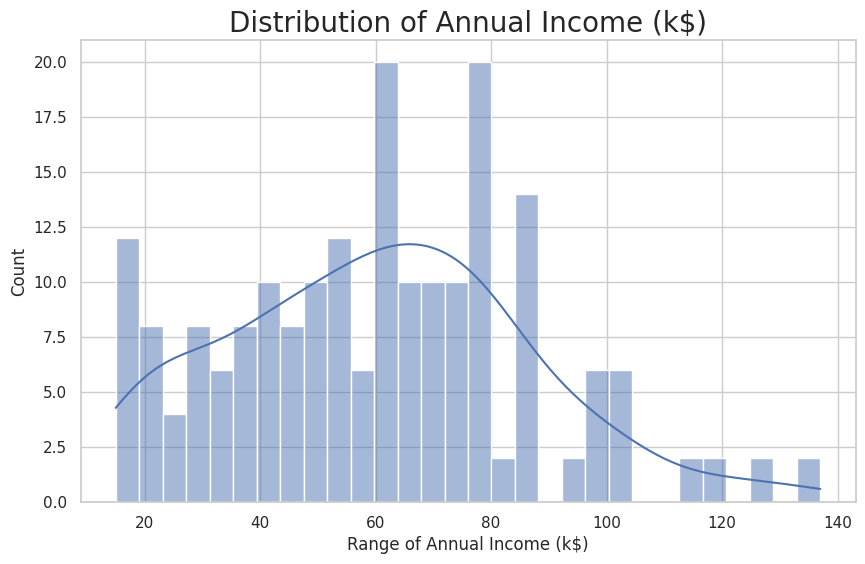

In [8]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Use histplot with kde
sns.histplot(data['Annual Income (k$)'], kde=True, bins=30)


plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()


Text(0, 0.5, 'Count')

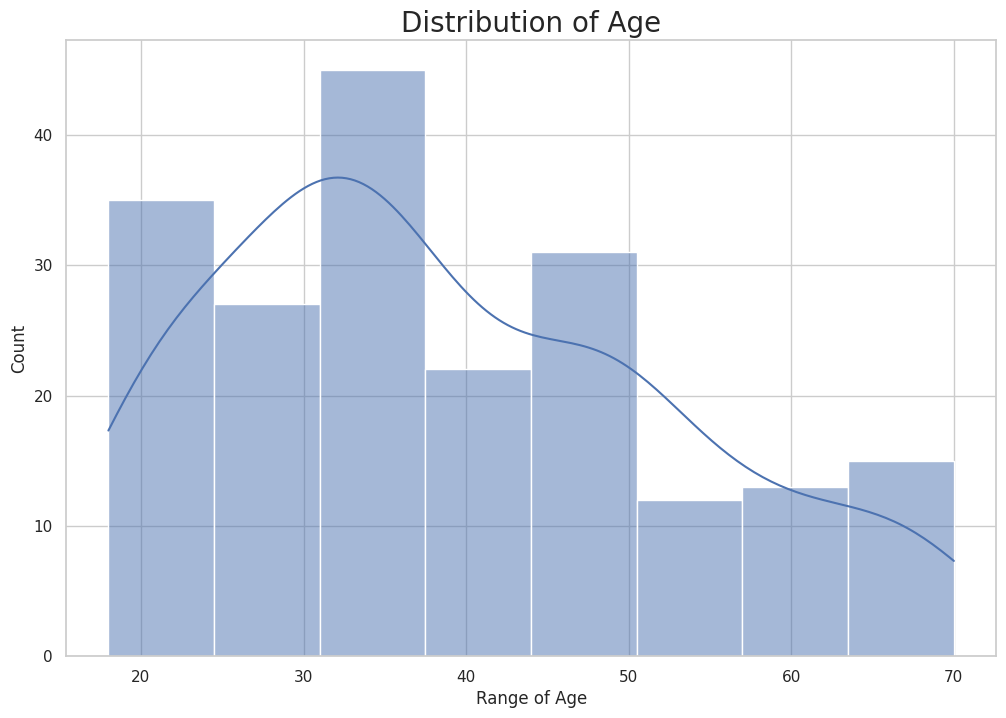

In [9]:
#Distribution of age
plt.figure(figsize=(12, 8))
sns.set(style = 'whitegrid')
sns.histplot(data['Age'], kde=True, bins=8)
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

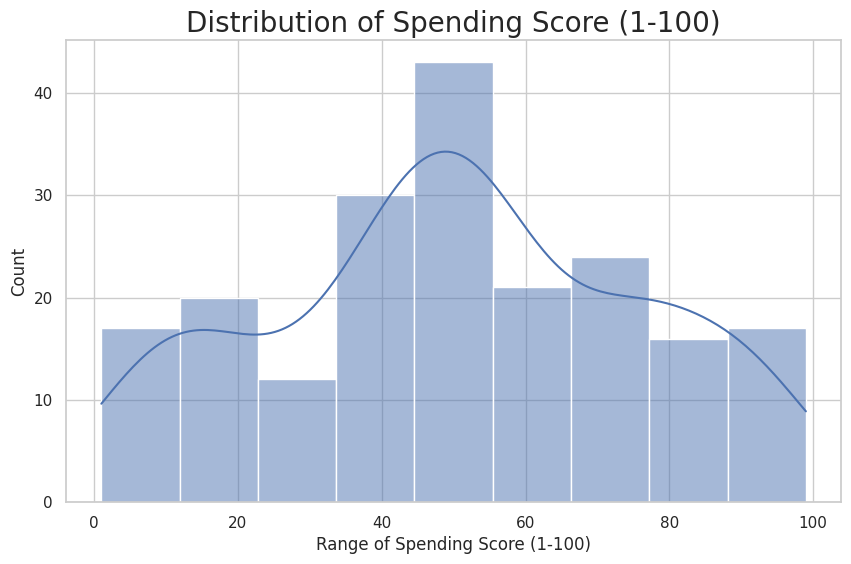

In [10]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(data['Spending Score (1-100)'], kde=True )
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

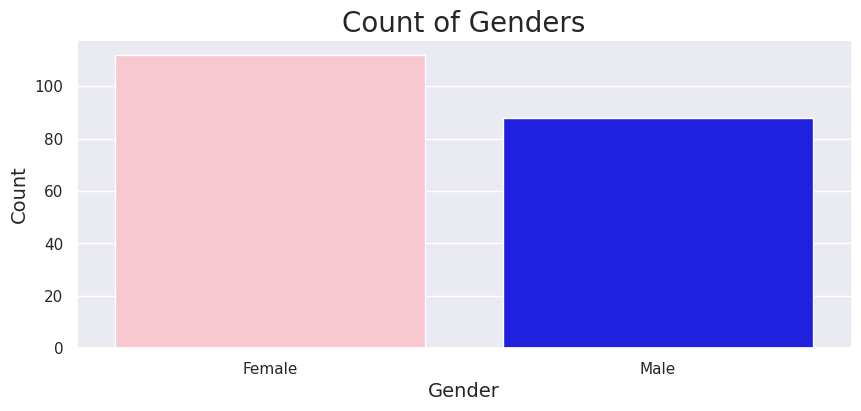

In [27]:
# Calculate gender counts
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
# Create a bar graph for gender distribution
sns.barplot(x=genders.index, y=genders.values, hue=genders.index, dodge=False,
            palette={'Male': 'blue', 'Female': 'pink'}, legend=False)
plt.title('Count of Genders', fontsize=20)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


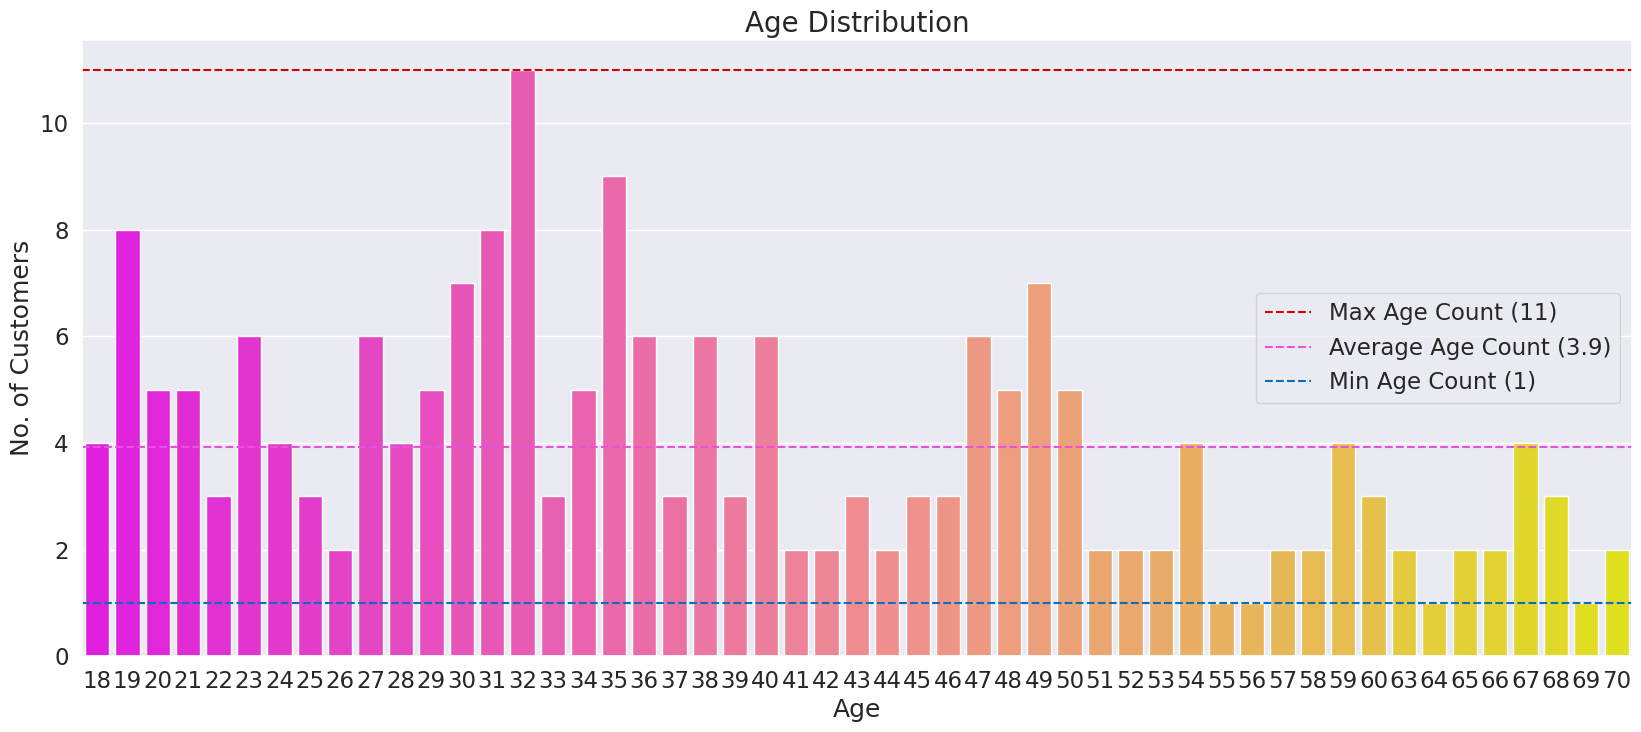

In [29]:
# age distribution

fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], hue=data['Age'], palette='spring', dodge=False, legend=False)
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--', color='#c90404',
           label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--', color='#eb50db',
           label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--', color='#046ebf',
           label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc='right')
ax.set_ylabel('No. of Customers')
plt.title('Age Distribution', fontsize=20)
plt.show()


Gender wise Age Distribution

Statistical Age Distribution of Male customers.

In [30]:
data[data['Gender']=='Male']['Age'].describe()

,Age
count,88.000000
mean,39.806818
std,15.514812
min,18.000000
25%,27.750000
50%,37.000000
75%,50.500000
max,70.000000


Statistical Age Distribution of female customers.

In [31]:
data[data['Gender']=='Female']['Age'].describe()

,Age
count,112.000000
mean,38.098214
std,12.644095
min,18.000000
25%,29.000000
50%,35.000000
75%,47.500000
max,68.000000


Visualizing Gender wise Age Distribution of Male and Female customers on a boxplot.

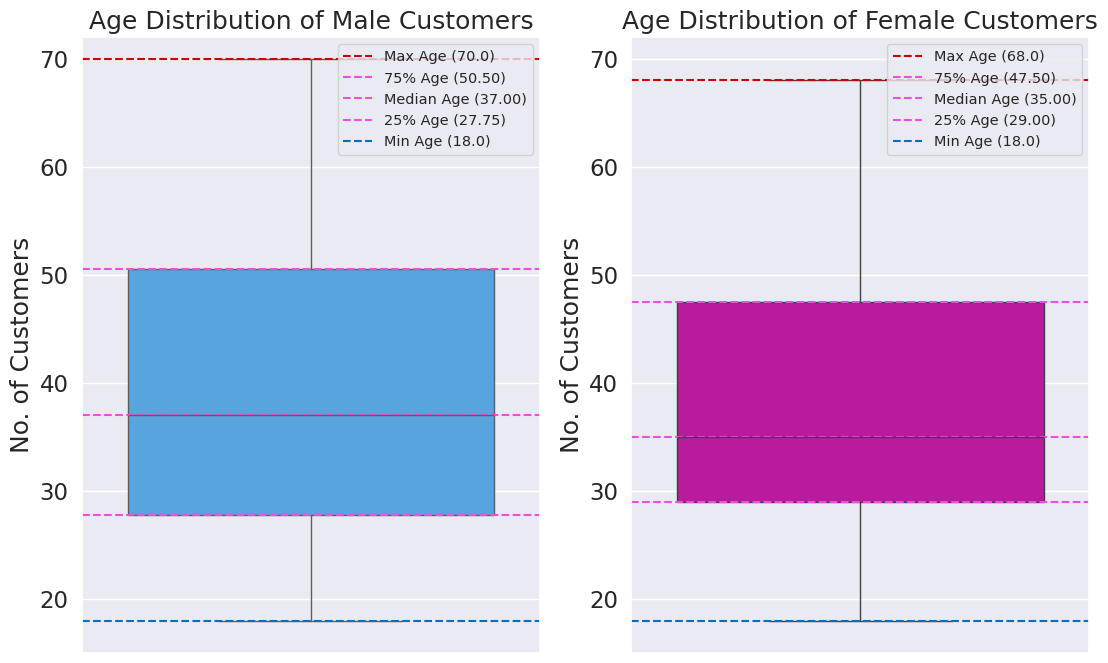

In [34]:
# Descriptive statistics for male and female age groups
data_male = data[data['Gender'] == 'Male']['Age'].describe()
data_female = data[data['Gender'] == 'Female']['Age'].describe()

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(13,8))
sns.set(font_scale=1.5)

# Box plot for male age distribution
sns.boxplot(y=data[data['Gender'] == 'Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data_male.iloc[7], linestyle='--', color='#c90404', label=f'Max Age ({data_male.iloc[7]})')
ax0.axhline(y=data_male.iloc[6], linestyle='--', color='#eb50db', label=f'75% Age ({data_male.iloc[6]:.2f})')
ax0.axhline(y=data_male.iloc[5], linestyle='--', color='#eb50db', label=f'Median Age ({data_male.iloc[5]:.2f})')
ax0.axhline(y=data_male.iloc[4], linestyle='--', color='#eb50db', label=f'25% Age ({data_male.iloc[4]:.2f})')
ax0.axhline(y=data_male.iloc[3], linestyle='--', color='#046ebf', label=f'Min Age ({data_male.iloc[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15, 72)

# Box plot for female age distribution
sns.boxplot(y=data[data['Gender'] == 'Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female.iloc[7], linestyle='--', color='#c90404', label=f'Max Age ({data_female.iloc[7]})')
ax1.axhline(y=data_female.iloc[6], linestyle='--', color='#eb50db', label=f'75% Age ({data_female.iloc[6]:.2f})')
ax1.axhline(y=data_female.iloc[5], linestyle='--', color='#eb50db', label=f'Median Age ({data_female.iloc[5]:.2f})')
ax1.axhline(y=data_female.iloc[4], linestyle='--', color='#eb50db', label=f'25% Age ({data_female.iloc[4]:.2f})')
ax1.axhline(y=data_female.iloc[3], linestyle='--', color='#046ebf', label=f'Min Age ({data_female.iloc[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15, 72)

plt.show()


In [35]:
#Average Age of Male Customers.
data[data['Gender']=='Male'].Age.mean()

,count
Age,
19,6
32,5
48,5
59,4
28,3


In [36]:
#Counts of first five max age counts in the Male Customers.
data[data['Gender']=='Male'].Age.value_counts().head()

,count
Age,
19,6
32,5
48,5
59,4
28,3


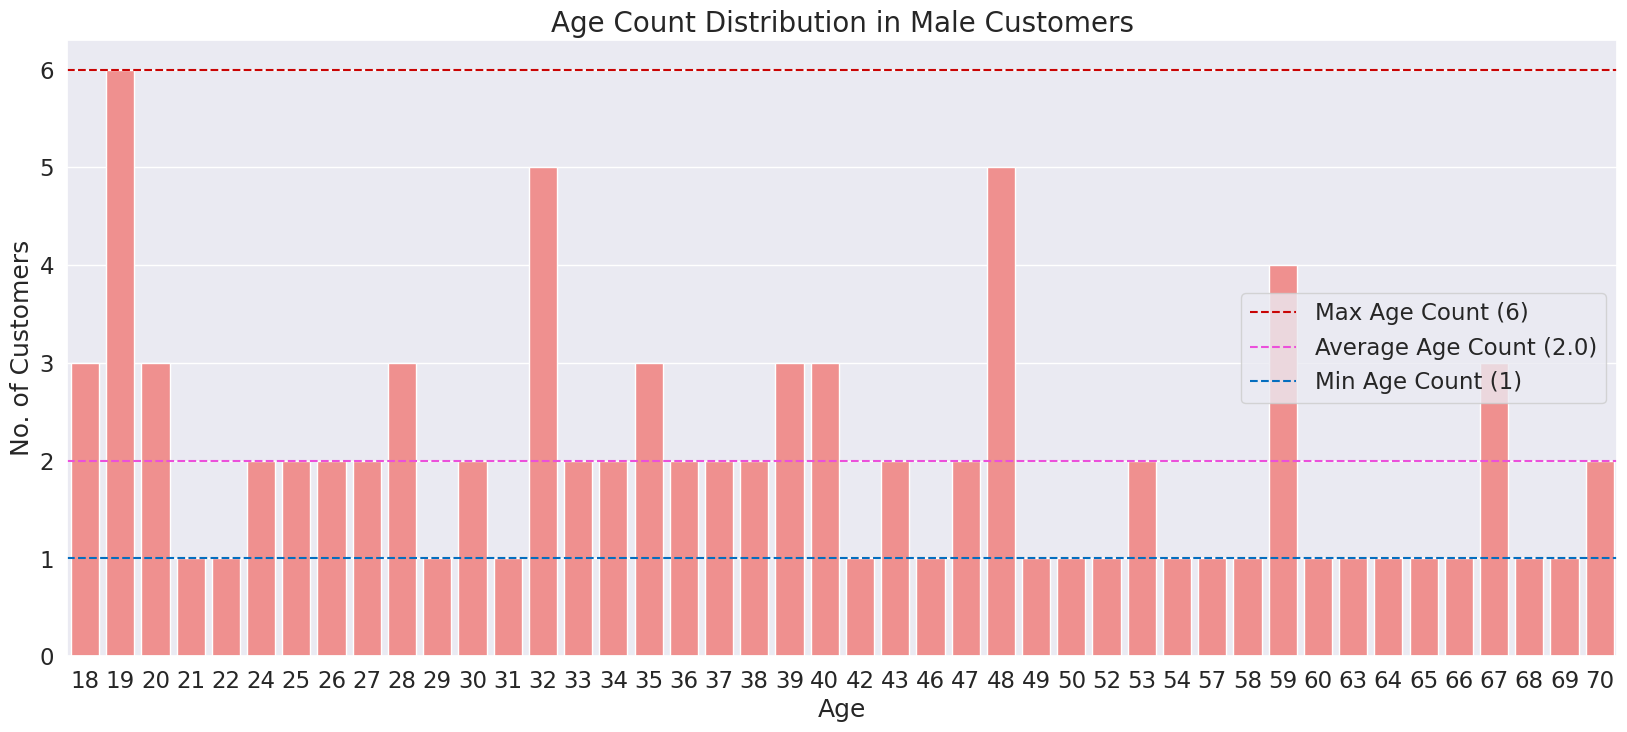

In [38]:
#Visualizing distribution of age count in Male customers using a countplot.

maxi = data[data['Gender'] == 'Male'].Age.value_counts().max()
mean = data[data['Gender'] == 'Male'].Age.value_counts().mean()
mini = data[data['Gender'] == 'Male'].Age.value_counts().min()

data_male = data[data['Gender'] == 'Male'].copy()
data_male['dummy_hue'] = 'Male'

fig, ax = plt.subplots(figsize=(20, 8))
sns.set(font_scale=1.5)

ax = sns.countplot(x='Age', hue='dummy_hue', data=data_male, palette='spring', legend=False)
ax.axhline(y=maxi, linestyle='--', color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--', color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--', color='#046ebf', label=f'Min Age Count ({mini})')

ax.set_ylabel('No. of Customers')
ax.legend(loc='right')
plt.title('Age Count Distribution in Male Customers', fontsize=20)

plt.show()


In [39]:
#Average Age of Female Customers.
data[data['Gender']=='Female'].Age.mean()

38.098214285714285

In [40]:
#Counts of first five max age count in the Female Customers.
data[data['Gender']=='Female'].Age.value_counts().head()

,count
Age,
31,7
23,6
49,6
32,6
35,6


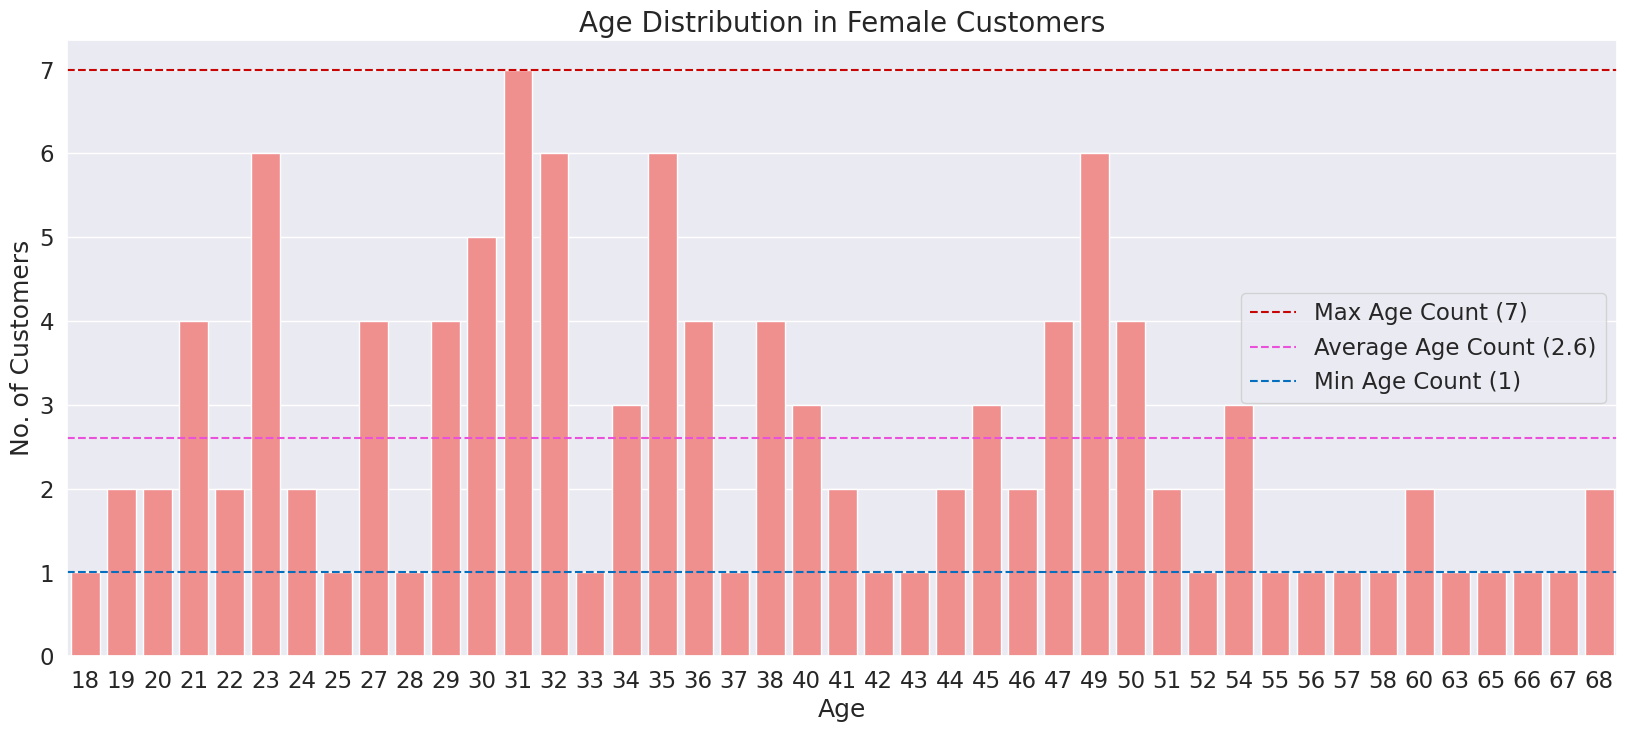

In [41]:
#Visualizing distribution of age count in Female customers using a countplot.

maxi = data[data['Gender'] == 'Female'].Age.value_counts().max()
mean = data[data['Gender'] == 'Female'].Age.value_counts().mean()
mini = data[data['Gender'] == 'Female'].Age.value_counts().min()

data_female = data[data['Gender'] == 'Female'].copy()
data_female['dummy_hue'] = 'Female'

fig, ax = plt.subplots(figsize=(20, 8))
sns.set(font_scale=1.5)

ax = sns.countplot(x='Age', hue='dummy_hue', data=data_female, palette='spring', legend=False)
ax.axhline(y=maxi, linestyle='--', color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--', color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--', color='#046ebf', label=f'Min Age Count ({mini})')

ax.set_ylabel('No. of Customers')
ax.legend(loc='right')
plt.title('Age Distribution in Female Customers', fontsize=20)

plt.show()


###Analyzing Data for Modelling

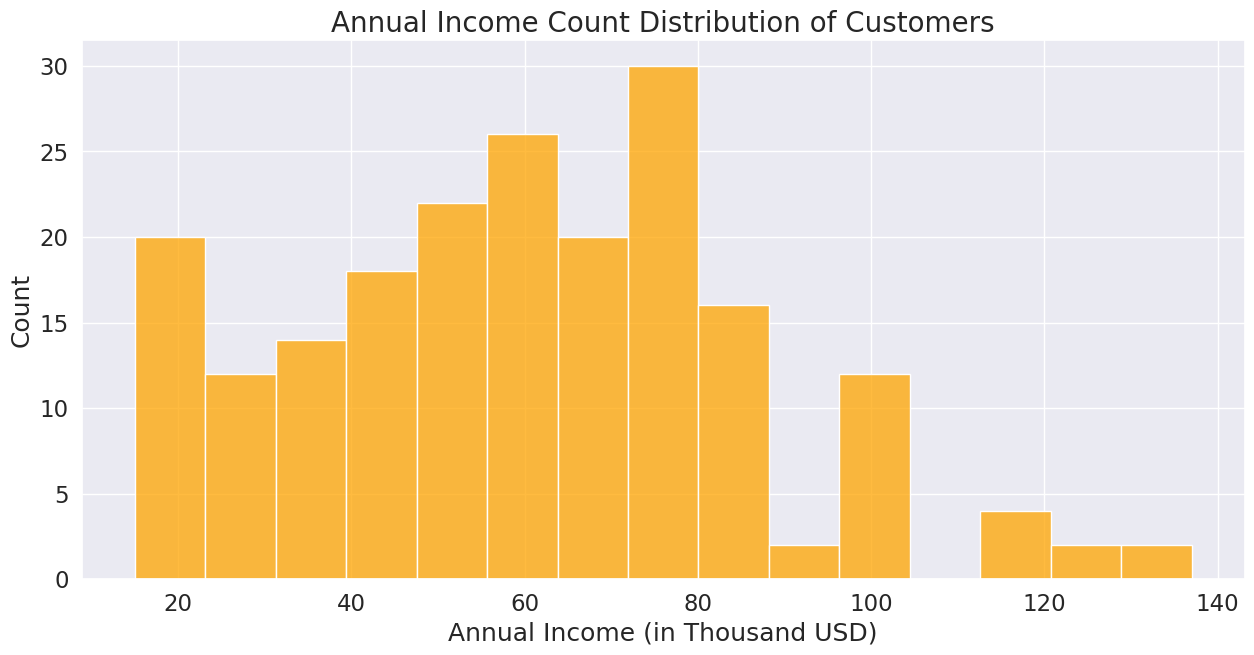

In [49]:
#Visualizing Annual Income count value distribution on a histogram.

fig, ax = plt.subplots(figsize=(15, 7))
sns.set(font_scale=1.5)

ax = sns.histplot(data['Annual Income (k$)'], bins=15, ax=ax, color='orange')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income Count Distribution of Customers', fontsize=20)

plt.show()


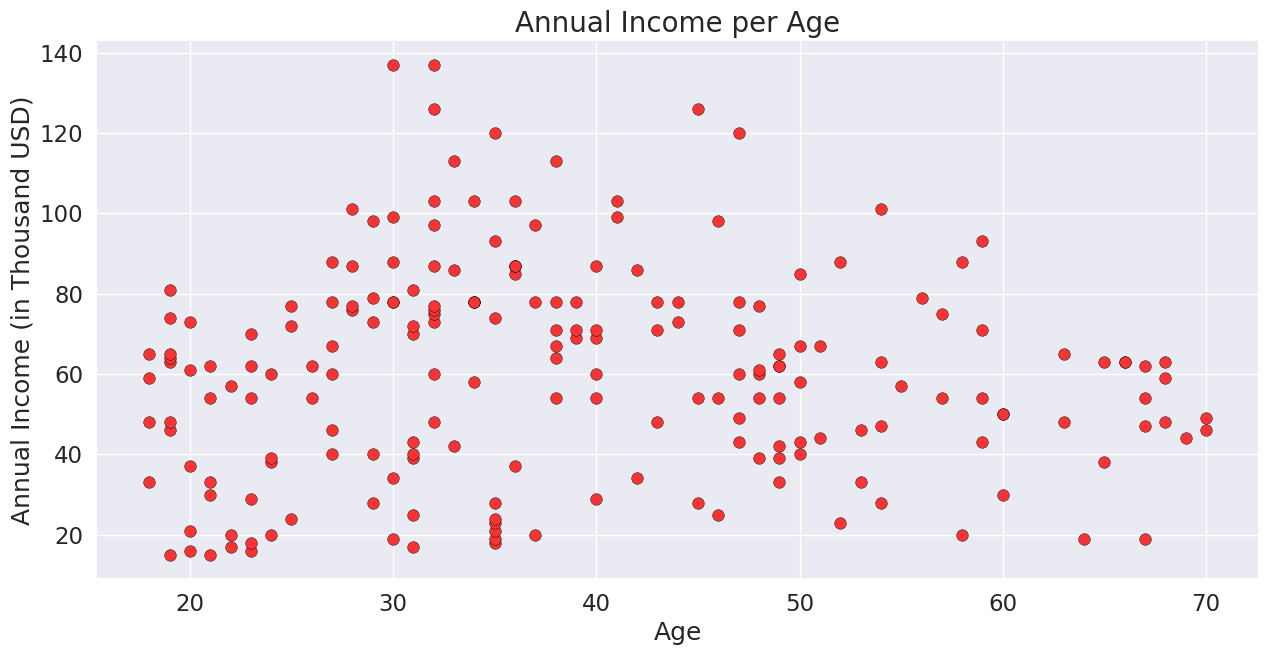

In [50]:
#Visualizing Annual Income per Age on a Scatterplot.

fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual Income (k$)'], x=data['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

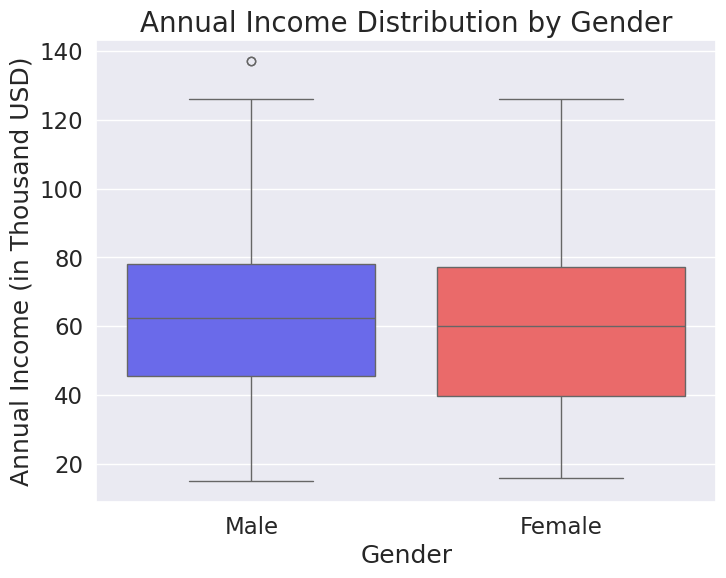

In [56]:
#Visualizing statistical difference of Annual Income between Male and Female Customers.

fig, ax = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Annual Income (k$)"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

**Analyzing Spending Score data**

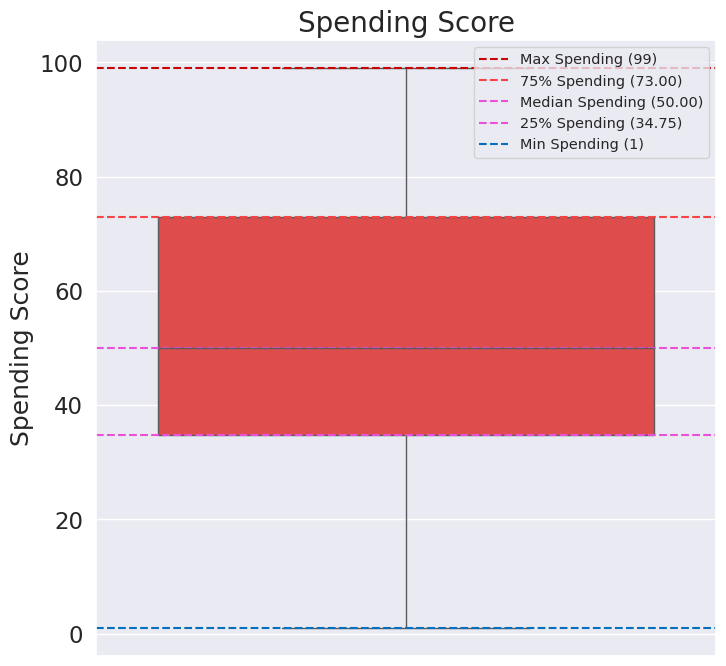

In [60]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.5)

ax = sns.boxplot(y=data['Spending Score (1-100)'], color="#f73434")

ax.axhline(y=data['Spending Score (1-100)'].max(), linestyle='--', color='#c90404', label=f'Max Spending ({data["Spending Score (1-100)"].max()})')
ax.axhline(y=data['Spending Score (1-100)'].quantile(0.75), linestyle='--', color='#f74343', label=f'75% Spending ({data["Spending Score (1-100)"].quantile(0.75):.2f})')
ax.axhline(y=data['Spending Score (1-100)'].median(), linestyle='--', color='#eb50db', label=f'Median Spending ({data["Spending Score (1-100)"].median():.2f})')
ax.axhline(y=data['Spending Score (1-100)'].quantile(0.25), linestyle='--', color='#eb50db', label=f'25% Spending ({data["Spending Score (1-100)"].quantile(0.25):.2f})')
ax.axhline(y=data['Spending Score (1-100)'].min(), linestyle='--', color='#046ebf', label=f'Min Spending ({data["Spending Score (1-100)"].min()})')

ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Spending Score')
plt.title('Spending Score', fontsize=20)
plt.show()


Spending Scores per Age

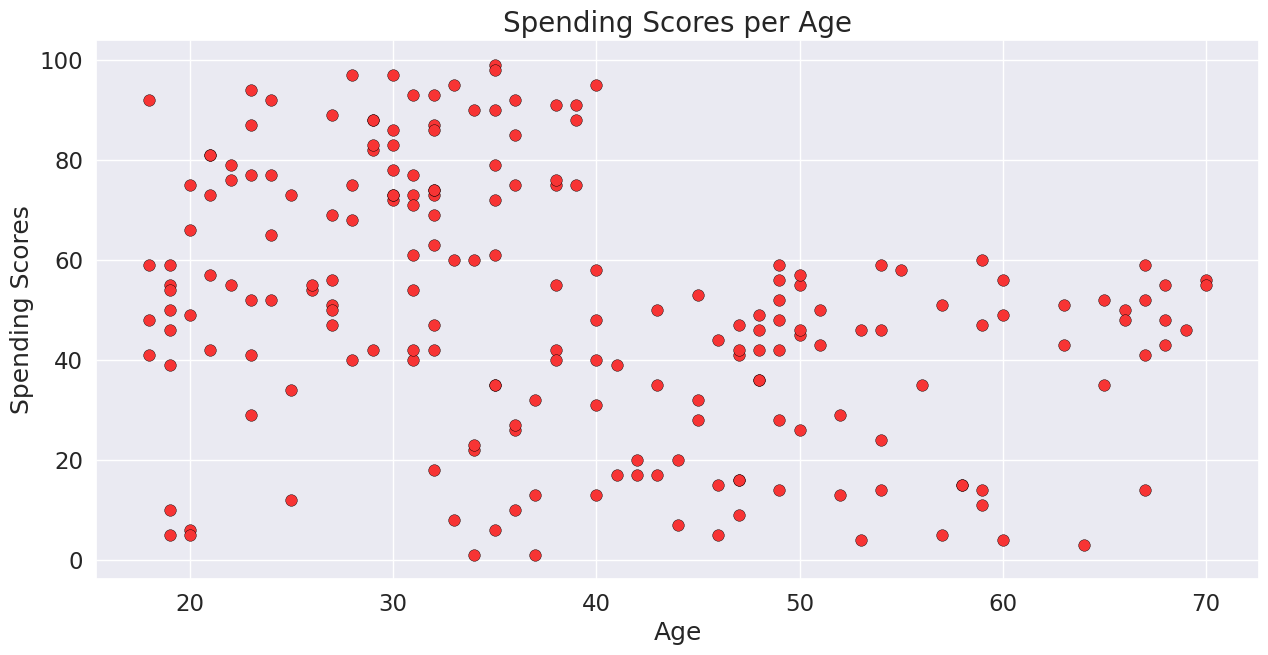

In [62]:
#Visualizing Spending Scores per Age on a scatterplot.

fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending Score (1-100)'], x=data['Age'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 20)
plt.show()


Spending Scores per Gender

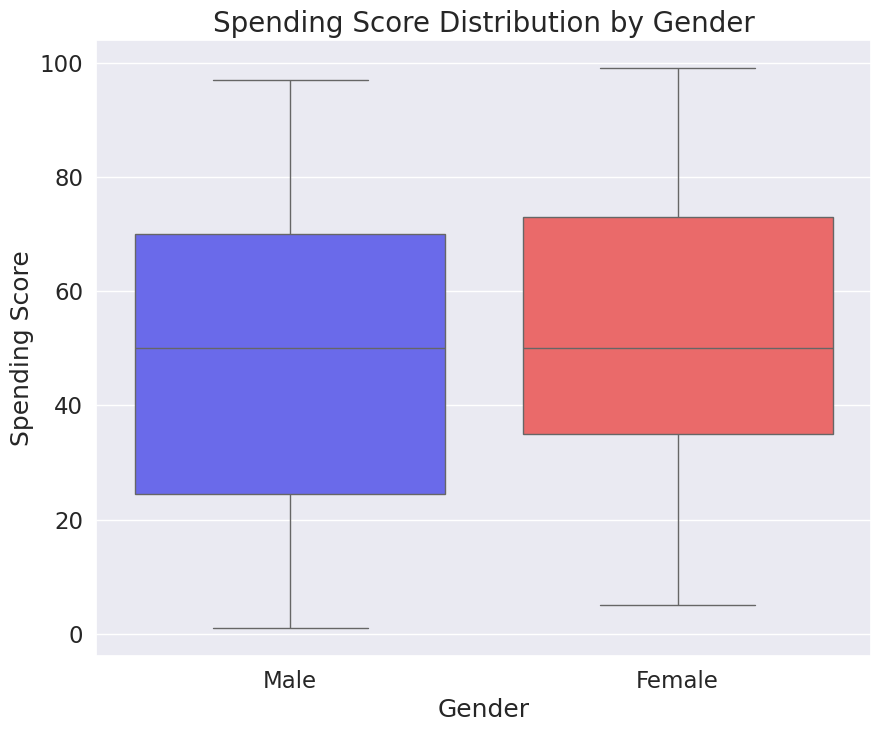

In [61]:
#Visualizing statistical difference of Spending Score between Male and Female Customers.

fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Spending Score (1-100)"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 20)
plt.show()

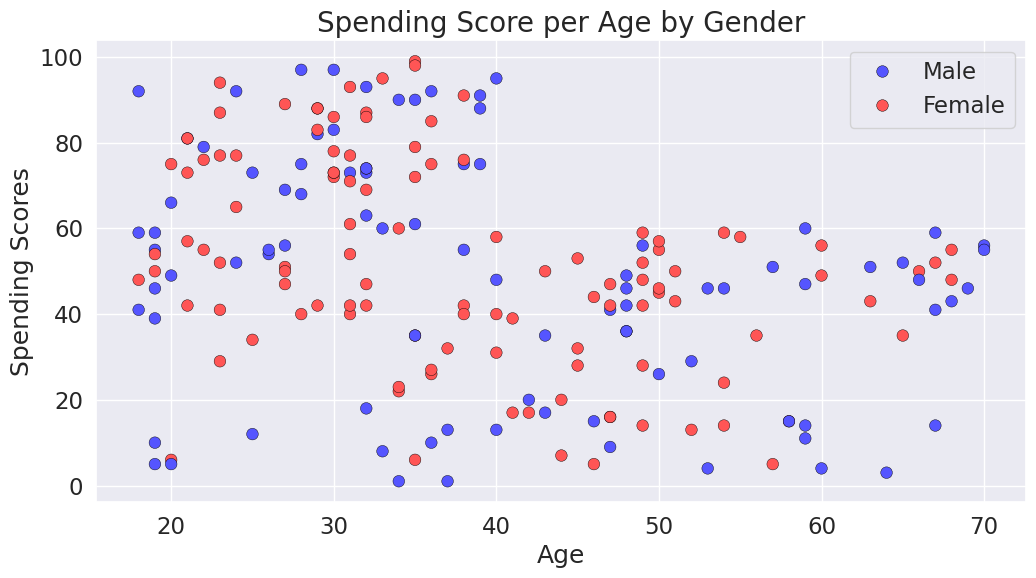

In [65]:
#Visualizing Spending Score per Age by Gender on a scatterplot.

fig, ax = plt.subplots(figsize=(12,6))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending Score (1-100)'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score per Age by Gender', fontsize = 20)
plt.show()

In [12]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [13]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


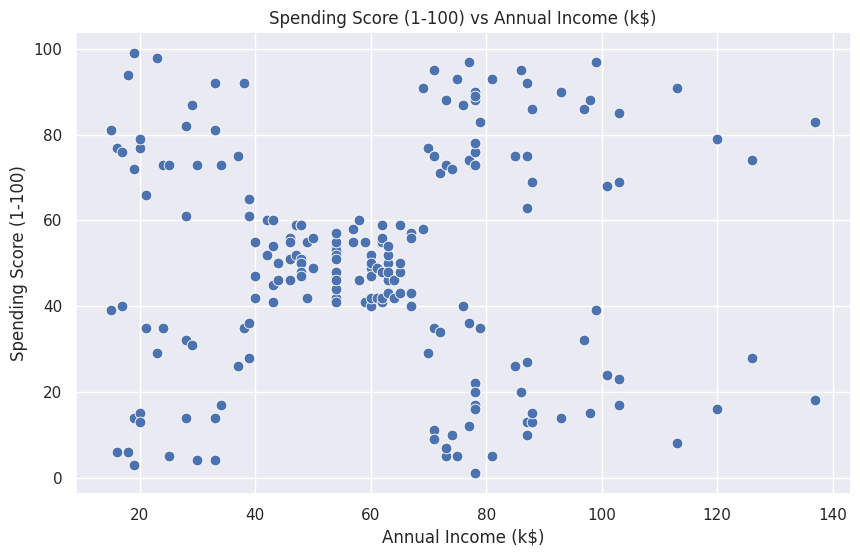

In [14]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

#K - Means Clustering
K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

In [15]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

###Choosing the number of clusters

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids.



#### WCSS -> Within Clusters Sum of Squares

In [16]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

To visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

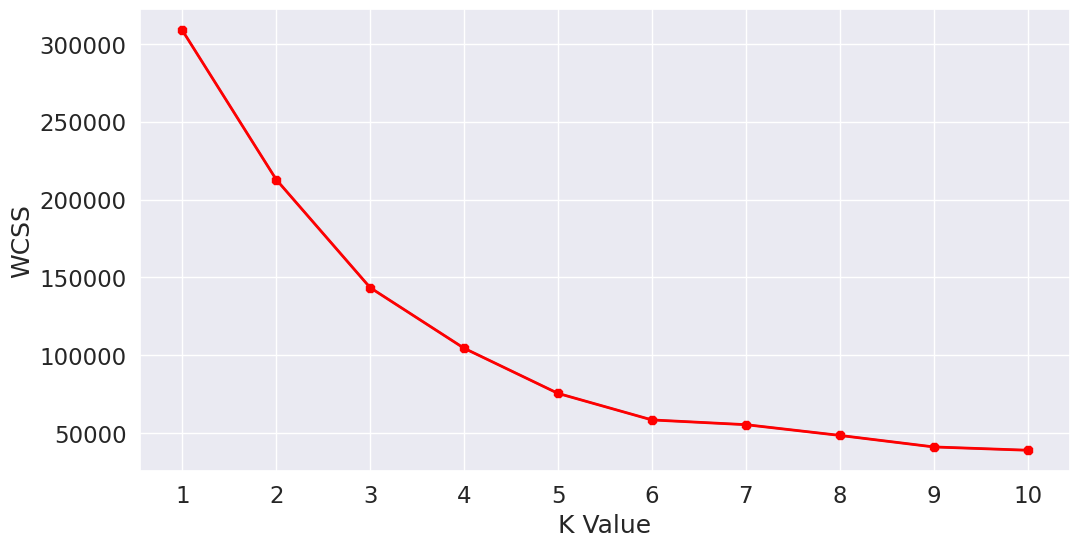

In [69]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

##Optimum Number of Clusters = 5

###Training the k-Means Clustering Model

In [18]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [70]:
#centroids of the clusters
km1.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [77]:
# determining the number of customers in each group
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 2nd group= 18
They are - [41 43 45 47 51 54 55 56 57 60 64 67 72 77 78 80 84 86]
--------------------------------------------
Number of customer in 3rd group= 10
They are - [181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 4th group= 29
They are - [ 58  61  63  65  68  71  73  74  75  81  83  87  90  91  93  97  99 102
 103 105 107 108 109 110 111 117 118 119 120]
--------------------------------------------
Number of customer in 5th group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
--------------------------------------------


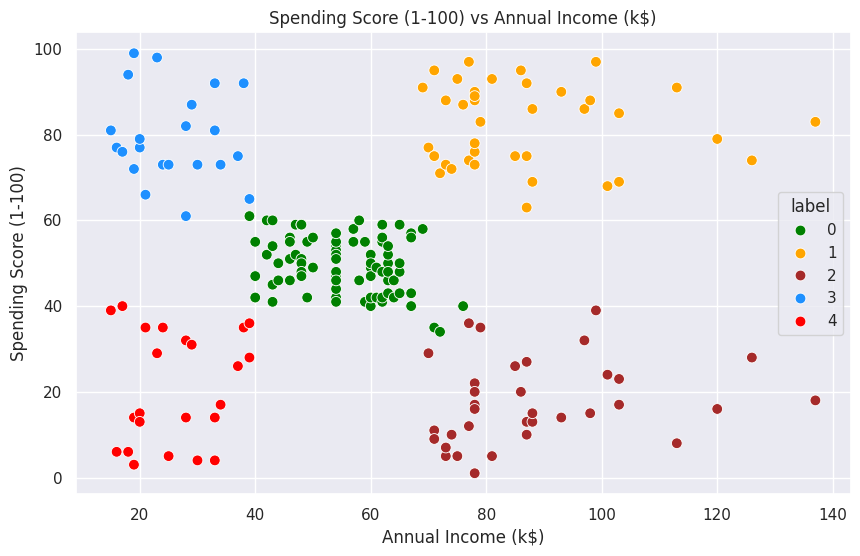

In [19]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## Analysis

Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the data. Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers. The following clusters are created by the model,

1. Cluster Orange
2. Cluster Blue
3. Cluster Purple
4. Cluster Red
5. Cluster Green







1. **Cluster Purple - Balanced Customers :**

They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

2. **Cluster Red - Pinch Penny Customers** :

Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

3. **Cluster Blue - Normal Customer :**

Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

4. **Cluster Green - Spenders :**

This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

5. **Cluster Orange - Target Customers :**

Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

In [83]:
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(km1, file)